In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df_train = pd.read_csv('data/train.csv')

train_size = df_train.shape[0]
print('Train Set Size: {} '.format(train_size))

df_test = pd.read_csv('data/test.csv')

test_size = df_test.shape[0]
print('Test Set Size: {} '.format(test_size))

all_data = pd.concat([df_train, df_test], sort=False)

Train Set Size: 1460 
Test Set Size: 1459 


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df_train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

---

# 1 - Exploratory Data Analysis

The objective of this step is to know the data, the relations between the variables and the distributions of the features.

---

In [5]:
df_train.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
274    275          20       RL         76.0     8314   Pave   NaN      Reg   
347    348          20       RL          NaN    17600   Pave   NaN      IR1   
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
57      58          60       RL         89.0    11645   Pave   NaN      IR1   
591    592          60       RL         97.0    13478   Pave   NaN      IR1   
922    923          20       RL         65.0    10237   Pave   NaN      Reg   
1242  1243          85       RL         85.0    10625   Pave   NaN      Reg   
568    569          50       RL         79.0    12327   Pave   NaN      IR1   
1165  1166          20       RL         79.0     9541   Pave   NaN      IR1   
524    525          60       RL         95.0    11787   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
274          Lvl    AllPub    ...            0    NaN    NaN         NaN   
347          Lvl    AllPub    ...            0    NaN    NaN         NaN   
0            Lvl    AllPub    ...            0    NaN    NaN         NaN   
57           Lvl    AllPub    ...            0    NaN    NaN         NaN   
591          Lvl    AllPub    ...            0    NaN    NaN         NaN   
922          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1242         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
568          Low    AllPub    ...            0    NaN    NaN         NaN   
1165         Lvl    AllPub    ...            0    NaN    NaN         NaN   
524          Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
274        0      6   2007        WD         Normal     124500  
347        0     12   2009        WD         Normal     157500  
0          0      2   2008        WD         Normal     208500  
57         0      8   2006        WD         Normal     196500  
591        0      6   2009     ConLI         Normal     451950  
922        0     10   2006       New        Partial     169990  
1242       0      1   2010        WD         Family     170000  
568        0      9   2009        WD         Normal     316600  
1165       0      9   2009       New        Partial     233170  
524        0      8   2007        WD         Normal     315750  

[10 rows x 81 columns]

In [6]:
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Numeric Features

In [7]:
numeric_features = df_train.select_dtypes(exclude=['object']).columns
selected_numeric_features = numeric_features

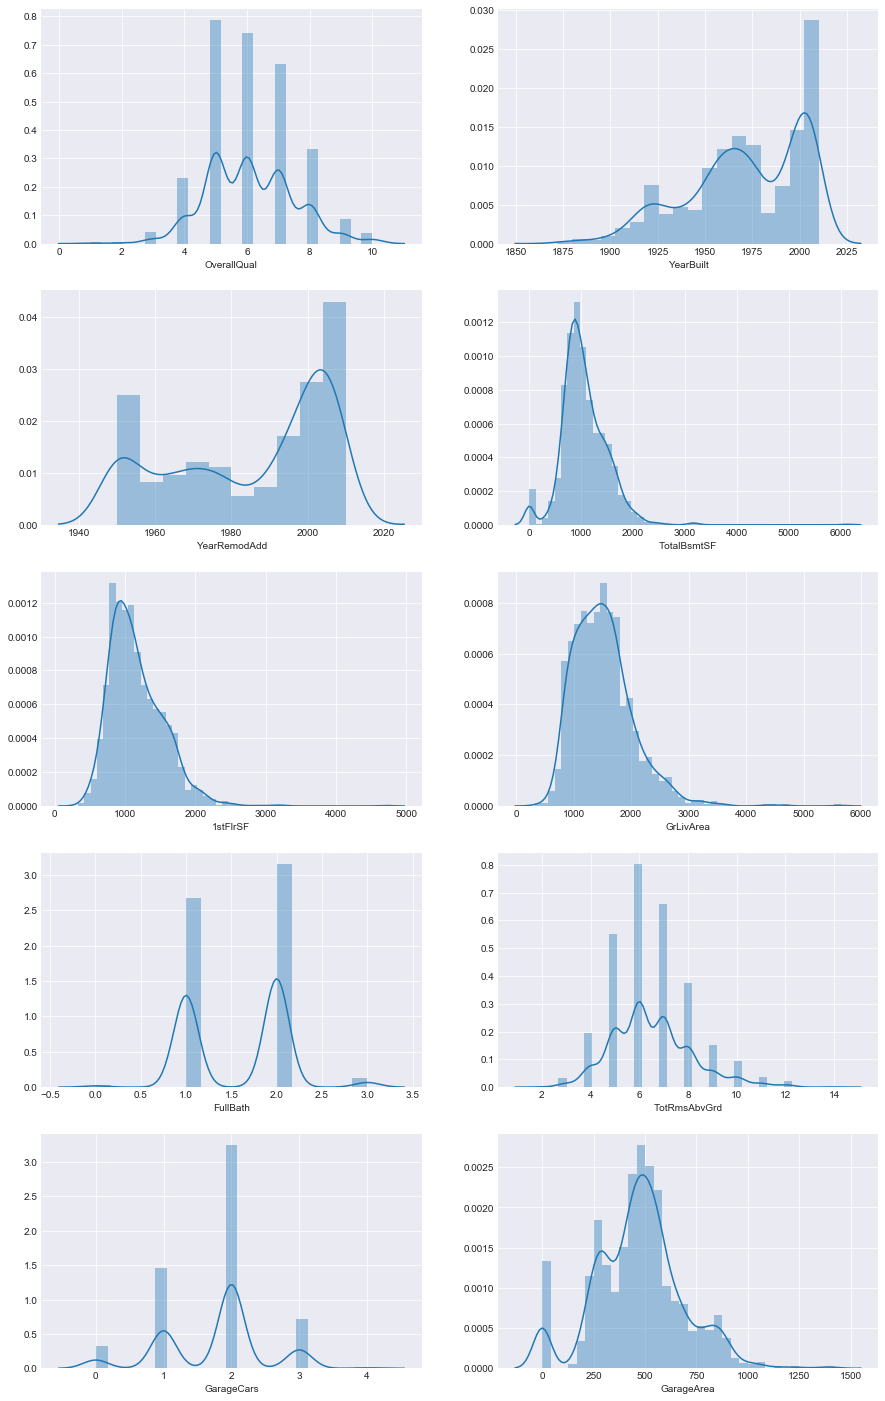

In [8]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
sns.distplot(df_train['OverallQual'], ax=axes[0,0])
sns.distplot(df_train['YearBuilt'], ax=axes[0,1])
sns.distplot(df_train['YearRemodAdd'], ax=axes[1,0])
sns.distplot(df_train['TotalBsmtSF'], ax=axes[1,1])
sns.distplot(df_train['1stFlrSF'], ax=axes[2,0])
sns.distplot(df_train['GrLivArea'], ax=axes[2,1])
sns.distplot(df_train['FullBath'], ax=axes[3,0])
sns.distplot(df_train['TotRmsAbvGrd'], ax=axes[3,1])
sns.distplot(df_train['GarageCars'], ax=axes[4,0])
sns.distplot(df_train['GarageArea'], ax=axes[4,1])

## Categorical Features

In [9]:
categorical_features = df_train.select_dtypes(include=['object']).columns

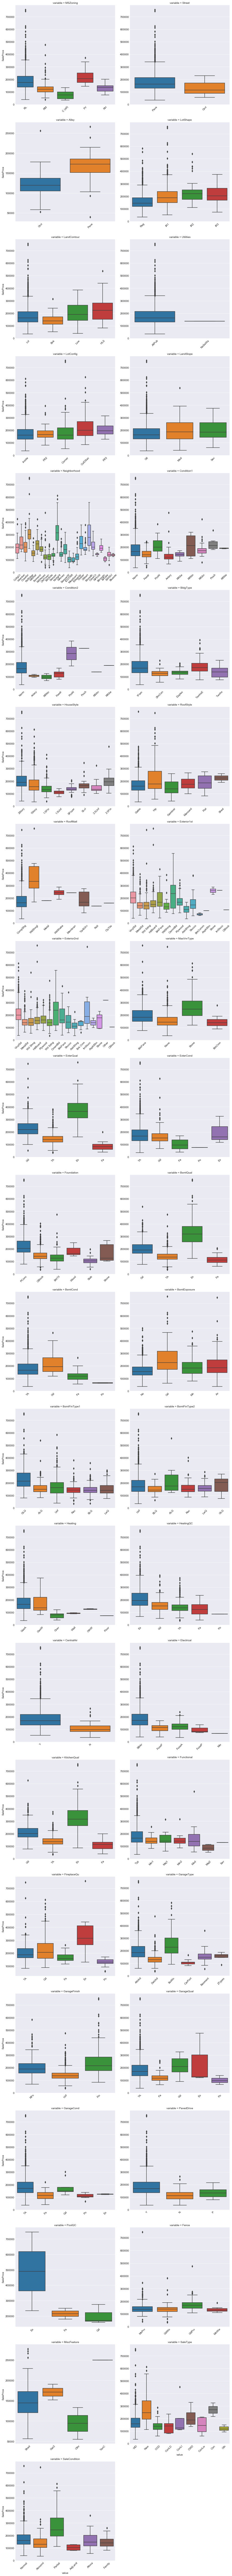

In [10]:
def bxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x = plt.xticks(rotation=45)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, size=6, sharex=False, sharey=False,)
g.map(bxplot, 'value', 'SalePrice')

- Since there are a lot of nominal features, with multiple categories, maybe it would be a good ideia to group some of he categories for dimensionality reduction.

## Target Variable

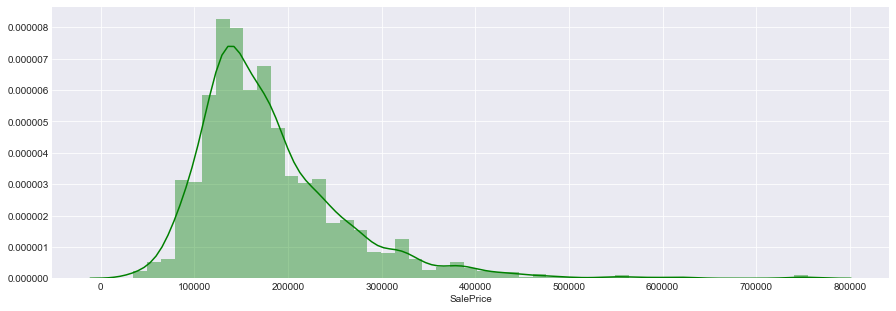

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df_train['SalePrice'], color='green')

- The target variable `SalePrice` is not normally distributed. A transformation will be required.

## Correlation

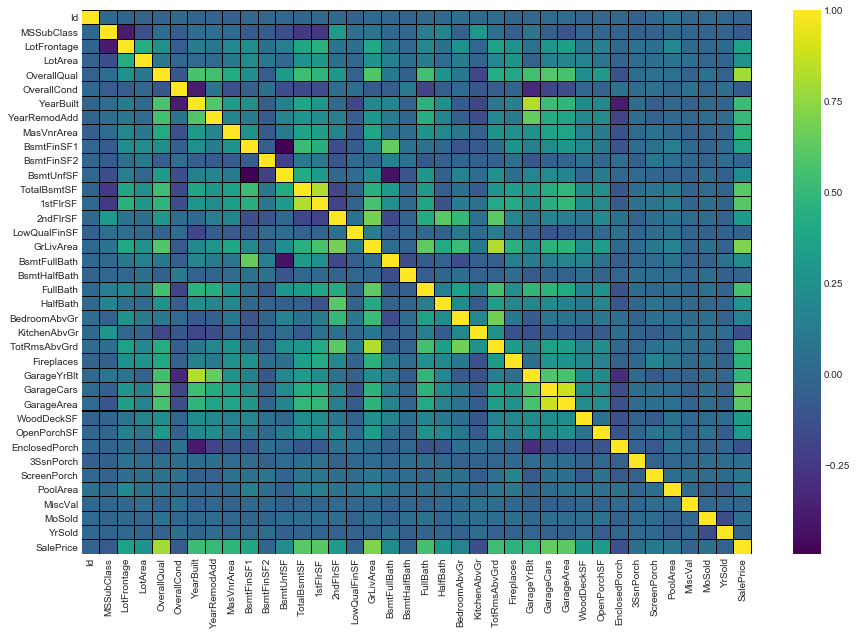

In [12]:
# Plot a heatmap to understand how the features are correlated with the target (SalePrice).
plt.figure(figsize=(15,10))
sns.heatmap(df_train[numeric_features].corr(), cmap='viridis', linewidths=.01, linecolor='black')

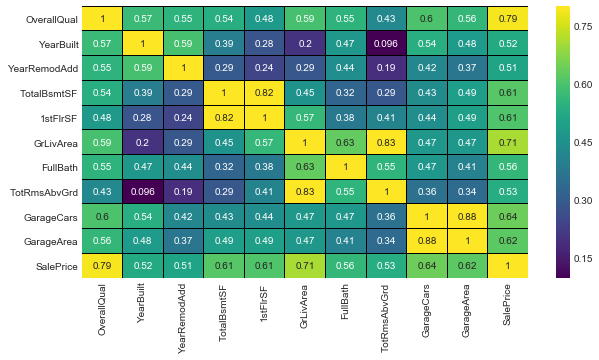

In [13]:
# Selecting the most correlated features with the Sale Price...(0.5 threshold)
price_correlation = df_train.corr()
price_correlation = price_correlation[price_correlation > 0.5]['SalePrice'].dropna()

# Plotting a simplified version of the heatmap for better understanding.
plt.figure(figsize=(10,5))
sns.heatmap(df_train[price_correlation.index].corr(), cmap='viridis', linewidths=.02, annot=True, linecolor='black', vmax=0.8)

- `OverallQual`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `GarageCars` and `GarageArea` are the most correlated features w/ `SalePrice`.
- `TotalBsmtSF` and `1stFlrSF` are strongly correlated.
- `GrLivArea` and `TotRmsAbvGrd` are strongly correlated.
- `GarageCars` and `GarageArea`are strongly correlated.

----

# Preprocessing

------

## Missing Values

In [14]:
def missing_ratio(df):
    missing = (df.isnull().sum() / df.shape[0]) * 100
    df_nulls = pd.DataFrame(data={'Column': missing.index.values, 'Count': df.isnull().sum().values, 'Ratio': missing.values})
    df_nulls.sort_values(by='Ratio', ascending=False, inplace=True)
    return df_nulls

In [15]:
null_ratios = missing_ratio(all_data.drop('SalePrice', axis=1))
null_ratios[null_ratios['Count'] > 0]

Column  Count      Ratio
72        PoolQC   2909  99.657417
74   MiscFeature   2814  96.402878
6          Alley   2721  93.216855
73         Fence   2348  80.438506
57   FireplaceQu   1420  48.646797
3    LotFrontage    486  16.649538
59   GarageYrBlt    159   5.447071
60  GarageFinish    159   5.447071
63    GarageQual    159   5.447071
64    GarageCond    159   5.447071
58    GarageType    157   5.378554
32  BsmtExposure     82   2.809181
31      BsmtCond     82   2.809181
30      BsmtQual     81   2.774923
35  BsmtFinType2     80   2.740665
33  BsmtFinType1     79   2.706406
25    MasVnrType     24   0.822199
26    MasVnrArea     23   0.787941
2       MSZoning      4   0.137033
55    Functional      2   0.068517
48  BsmtHalfBath      2   0.068517
47  BsmtFullBath      2   0.068517
9      Utilities      2   0.068517
61    GarageCars      1   0.034258
53   KitchenQual      1   0.034258
34    BsmtFinSF1      1   0.034258
78      SaleType      1   0.034258
36    BsmtFinSF2      1   0.034258
37     BsmtUnfSF      1   0.034258
38   TotalBsmtSF      1   0.034258
24   Exterior2nd      1   0.034258
23   Exterior1st      1   0.034258
62    GarageArea      1   0.034258
42    Electrical      1   0.034258

### LotFrontage

In [16]:
all_data[all_data['LotFrontage'].isnull()].head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
31  32          20       RL          NaN     8544   Pave   NaN      IR1   
42  43          85       RL          NaN     9180   Pave   NaN      IR1   
43  44          20       RL          NaN     9200   Pave   NaN      IR1   
50  51          60       RL          NaN    13869   Pave   NaN      IR2   
64  65          60       RL          NaN     9375   Pave   NaN      Reg   

   LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
7          Lvl    AllPub    ...            0    NaN    NaN        Shed   
12         Lvl    AllPub    ...            0    NaN    NaN         NaN   
14         Lvl    AllPub    ...            0    NaN   GdWo         NaN   
16         Lvl    AllPub    ...            0    NaN    NaN        Shed   
24         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
31         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
42         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
43         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
50         Lvl    AllPub    ...            0    NaN    NaN         NaN   
64         Lvl    AllPub    ...            0    NaN  GdPrv         NaN   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
7      350     11   2009        WD         Normal   200000.0  
12       0      9   2008        WD         Normal   144000.0  
14       0      5   2008        WD         Normal   157000.0  
16     700      3   2010        WD         Normal   149000.0  
24       0      5   2010        WD         Normal   154000.0  
31       0      6   2008        WD         Normal   149350.0  
42       0     12   2007        WD         Normal   144000.0  
43       0      7   2008        WD         Normal   130250.0  
50       0      7   2007        WD         Normal   177000.0  
64       0      2   2009        WD         Normal   219500.0  

[10 rows x 81 columns]

In [68]:
# Replace the NaN's in LotFrontage with the neighborhood's median.
by_neighbor = all_data.groupby(by='Neighborhood', sort=True)

def neighborhood_median(row):
    median = by_neighbor['LotFrontage'].median()[row['Neighborhood']]
    return median

all_data['LotFrontage'] = all_data.apply(lambda row: neighborhood_median(row) if np.isnan(row['LotFrontage']) else row['LotFrontage'], axis=1)

In [69]:
all_data.groupby("Neighborhood")["LotFrontage"].transform()

TypeError: transform() missing 1 required positional argument: 'func'

### Garage Features

In [18]:
# GarageArea
all_data[all_data['GarageArea'] == 0][['GarageCars',
                                       'GarageCond', 
                                       'GarageType', 
                                       'GarageFinish', 
                                       'GarageQual', 
                                       'GarageYrBlt']].head(10)

GarageCars GarageCond GarageType GarageFinish GarageQual  GarageYrBlt
39          0.0        NaN        NaN          NaN        NaN          NaN
48          0.0        NaN        NaN          NaN        NaN          NaN
78          0.0        NaN        NaN          NaN        NaN          NaN
88          0.0        NaN        NaN          NaN        NaN          NaN
89          0.0        NaN        NaN          NaN        NaN          NaN
99          0.0        NaN        NaN          NaN        NaN          NaN
108         0.0        NaN        NaN          NaN        NaN          NaN
125         0.0        NaN        NaN          NaN        NaN          NaN
127         0.0        NaN        NaN          NaN        NaN          NaN
140         0.0        NaN        NaN          NaN        NaN          NaN

In [19]:
# GarageArea and GarageCars: Filling NaN's with 0.
all_data.fillna({'GarageArea': 0, 'GarageCars': 0}, inplace=True)

# Replace GarageCond, GarageType, GarageFinish, GarageQual and GarageYrBlt "NaN's" with "NA" when GarageArea = 0;
mask = (all_data['GarageArea'] == 0)
all_data.loc[mask, ['GarageCond','GarageType','GarageFinish','GarageQual','GarageYrBlt']] = "NA"

# Replace GarageCond, GarageType, GarageFinish, GarageQual and GarageYrBlt "NaN's" with "None" when GarageArea > 0;
mask = (all_data['GarageArea'] > 0)
all_data.loc[mask, ['GarageCond','GarageType','GarageFinish','GarageQual','GarageYrBlt']] = "None"

### Basement Features

In [20]:
# TotalBsmtSF
all_data[all_data['TotalBsmtSF'].isnull()][['TotalBsmtSF','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
                                             'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtExposure',
                                             'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF']]

TotalBsmtSF BsmtQual BsmtCond BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
660          NaN      NaN      NaN          NaN         NaN          NaN   

     BsmtFinSF2  BsmtUnfSF BsmtExposure  BsmtFullBath  BsmtHalfBath  \
660         NaN        NaN          NaN           NaN           NaN   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  
660         NaN         NaN        NaN

In [21]:
all_data[all_data['BsmtFinType2'].isnull()][['TotalBsmtSF','BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1',
                                             'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','BsmtExposure',
                                             'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                                             'BsmtUnfSF']].head(10)

TotalBsmtSF BsmtQual BsmtCond BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17           0.0      NaN      NaN          NaN         0.0          NaN   
39           0.0      NaN      NaN          NaN         0.0          NaN   
90           0.0      NaN      NaN          NaN         0.0          NaN   
102          0.0      NaN      NaN          NaN         0.0          NaN   
156          0.0      NaN      NaN          NaN         0.0          NaN   
182          0.0      NaN      NaN          NaN         0.0          NaN   
259          0.0      NaN      NaN          NaN         0.0          NaN   
332       3206.0       Gd       TA          GLQ      1124.0          NaN   
342          0.0      NaN      NaN          NaN         0.0          NaN   
362          0.0      NaN      NaN          NaN         0.0          NaN   

     BsmtFinSF2  BsmtUnfSF BsmtExposure  BsmtFullBath  BsmtHalfBath  \
17          0.0        0.0          NaN           0.0           0.0   
39          0.0        0.0          NaN           0.0           0.0   
90          0.0        0.0          NaN           0.0           0.0   
102         0.0        0.0          NaN           0.0           0.0   
156         0.0        0.0          NaN           0.0           0.0   
182         0.0        0.0          NaN           0.0           0.0   
259         0.0        0.0          NaN           0.0           0.0   
332       479.0     1603.0           No           1.0           0.0   
342         0.0        0.0          NaN           0.0           0.0   
362         0.0        0.0          NaN           0.0           0.0   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  
17          0.0         0.0        0.0  
39          0.0         0.0        0.0  
90          0.0         0.0        0.0  
102         0.0         0.0        0.0  
156         0.0         0.0        0.0  
182         0.0         0.0        0.0  
259         0.0         0.0        0.0  
332      1124.0       479.0     1603.0  
342         0.0         0.0        0.0  
362         0.0         0.0        0.0

In [22]:
# Filling NaN's with zeroes;
all_data.fillna({'TotalBsmtSF': 0,
                 'BsmtFullBath': 0,
                 'BsmtHalfBath': 0,
                 'BsmtFinSF1': 0,
                 'BsmtFinSF2': 0,
                 'BsmtUnfSF': 0}, inplace=True)

# Replace BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2 and BsmtExposure "NaN's" with "NA" when TotalBsmtSF = 0;
mask = (all_data['TotalBsmtSF'] == 0)
all_data.loc[mask, ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']] = "NA"

# Replace BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2 and BsmtExposure "NaN's" with "None" when TotalBsmtSF > 0;
mask = (all_data['TotalBsmtSF'] > 0)
all_data.loc[mask, ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']] = "None"

### MasVnrArea & MasVnrType

In [23]:
# MasVnrArea and MasVnrType...
all_data[all_data['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']].head(10)

MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
231          NaN        NaN
246          NaN        NaN

In [24]:
# Replace MasVnrArea NaN's with 0;
# Replace MasVnrType NaN's with "None";
all_data.fillna({'MasVnrArea': 0, 
                 'MasVnrType': 'None'}, inplace=True)

### Electrical

In [25]:
# ELectrical
all_data[all_data['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1379         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379       0      5   2008        WD         Normal   167500.0  

[1 rows x 81 columns]

In [26]:
all_data['Electrical'].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [37]:
# Replace `Electrical` NaN with the most common value: SBrkr
all_data.fillna({'Electrical': all_data['Electrical'].mode()[0]}, inplace=True)

### MSZoning

In [39]:
all_data[all_data['MSZoning'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455   1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
756   2217          20      NaN         80.0    14584   Pave   NaN      Reg   
790   2251          70      NaN         60.0    56600   Pave   NaN      IR1   
1444  2905          20      NaN        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
455          Lvl       NaN    ...            0    NaN   NaN         NaN   
756          Low    AllPub    ...            0    NaN   NaN         NaN   
790          Low    AllPub    ...            0    NaN   NaN         NaN   
1444         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
455        0      3   2009     ConLD         Normal        NaN  
756        0      2   2008        WD        Abnorml        NaN  
790        0      1   2008        WD         Normal        NaN  
1444       0      5   2006        WD         Normal        NaN  

[4 rows x 81 columns]

In [41]:
all_data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [42]:
# Replace `MSZoning` NaN with the most common value: RL
all_data.fillna({'MSZoning': all_data['MSZoning'].mode()[0]}, inplace=True)

### Utilities

In [63]:
all_data[all_data['Utilities'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
455  1916          30       RL        109.0    21780   Grvl   NaN      Reg   
485  1946          20       RL         64.0    31220   Pave   NaN      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
455         Lvl       NaN    ...            0    NaN   NaN         NaN   
485         Bnk       NaN    ...            0    NaN   NaN        Shed   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
455       0      3   2009     ConLD         Normal        NaN  
485     750      5   2008        WD         Normal        NaN  

[2 rows x 81 columns]

In [64]:
all_data['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

### Functional

In [43]:
all_data[all_data['Functional'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
756   2217          20       RL         80.0    14584   Pave   NaN      Reg   
1013  2474          50       RM         60.0    10320   Pave  Grvl      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
756          Low    AllPub    ...            0    NaN   NaN         NaN   
1013         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
756        0      2   2008        WD        Abnorml        NaN  
1013       0      9   2007       COD        Abnorml        NaN  

[2 rows x 81 columns]

In [45]:
all_data['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [46]:
# Replace `MSZoning` NaN with the most common value: Functional
all_data.fillna({'Functional': all_data['Functional'].mode()[0]}, inplace=True)

### Exterior1st and Exterior2nd

In [57]:
all_data[(all_data['Exterior1st'].isnull()) | (all_data['Exterior2nd'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691  2152          30       RL         85.0    19550   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
691         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       0      1   2008        WD         Normal        NaN  

[1 rows x 81 columns]

In [59]:
all_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [60]:
all_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [61]:
# Replace `Exterior1st` and `Exterior2nd` NaN with the most common value: VinylSd
all_data.fillna({'Exterior1st': all_data['Exterior1st'].mode()[0],
                 'Exterior2nd': all_data['Exterior2nd'].mode()[0]}, inplace=True)

### SaleType

In [52]:
all_data[all_data['SaleType'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1029  2490          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1029         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1029       0     10   2007       NaN         Normal        NaN  

[1 rows x 81 columns]

In [54]:
all_data['SaleType'].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [55]:
# Replace `SaleType` NaN with the most common value: WD
all_data.fillna({'SaleType': all_data['SaleType'].mode()[0]}, inplace=True)

### KitchenQual

In [48]:
all_data[all_data['KitchenQual'].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
95  1556          50       RL         72.0    10632   Pave   NaN      IR1   

   LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
95         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
95      1   2010       COD         Normal        NaN  

[1 rows x 81 columns]

In [50]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [51]:
# Replace `KitchenQual` NaN with the most common value: TA
all_data.fillna({'KitchenQual': all_data['KitchenQual'].mode()[0]}, inplace=True)

- `PoolQC`, `MiscFeature`, `Alley`, `Fence` and `FireplaceQu` have too many null values. I'm not inputing these features because an input of more than 50% would distort the feature too much. I also dont think they are so important for the predictions.

In [66]:
all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

KeyError: "['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu'] not found in axis"

---

In [67]:
# Checking for remaining NaN's
null_ratios = missing_ratio(all_data.drop('SalePrice', axis=1))
null_ratios[null_ratios['Count'] > 0]

Column  Count     Ratio
8  Utilities      2  0.068517

## Feature Transformation

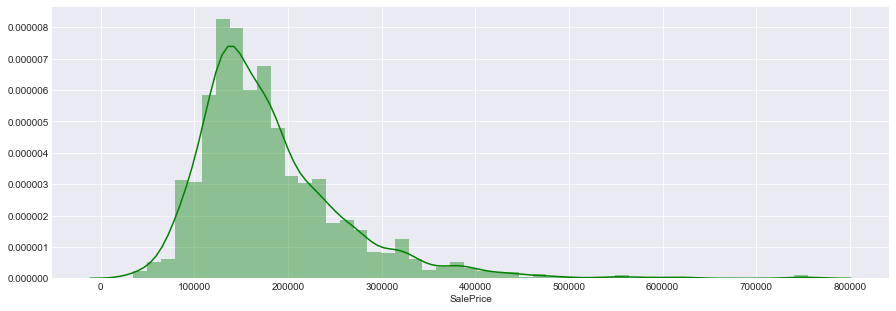

In [67]:
# As seen before, the target feature isn't normally distributed.
plt.figure(figsize=(15,5))
sns.distplot(df_train['SalePrice'], color='green')

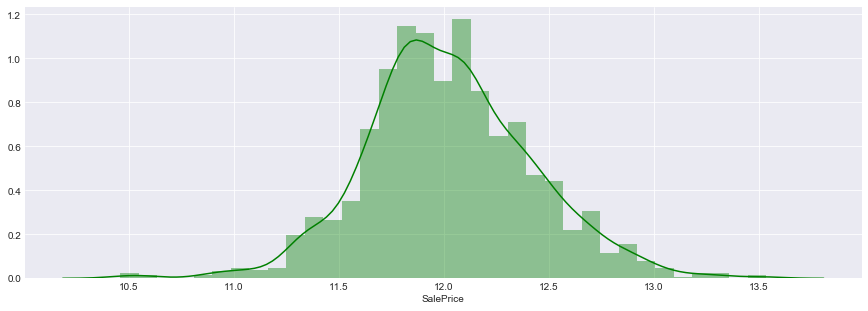

In [68]:
# Checking the feature distribution after the transformation. It looks more normal now.
plt.figure(figsize=(15,5))
sns.distplot(np.log(df_train['SalePrice']), color='green')

In [69]:
# Applying log transformation.
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [70]:
selected_numeric_features = ['OverallQual','GarageCars']

## Outlier Detection

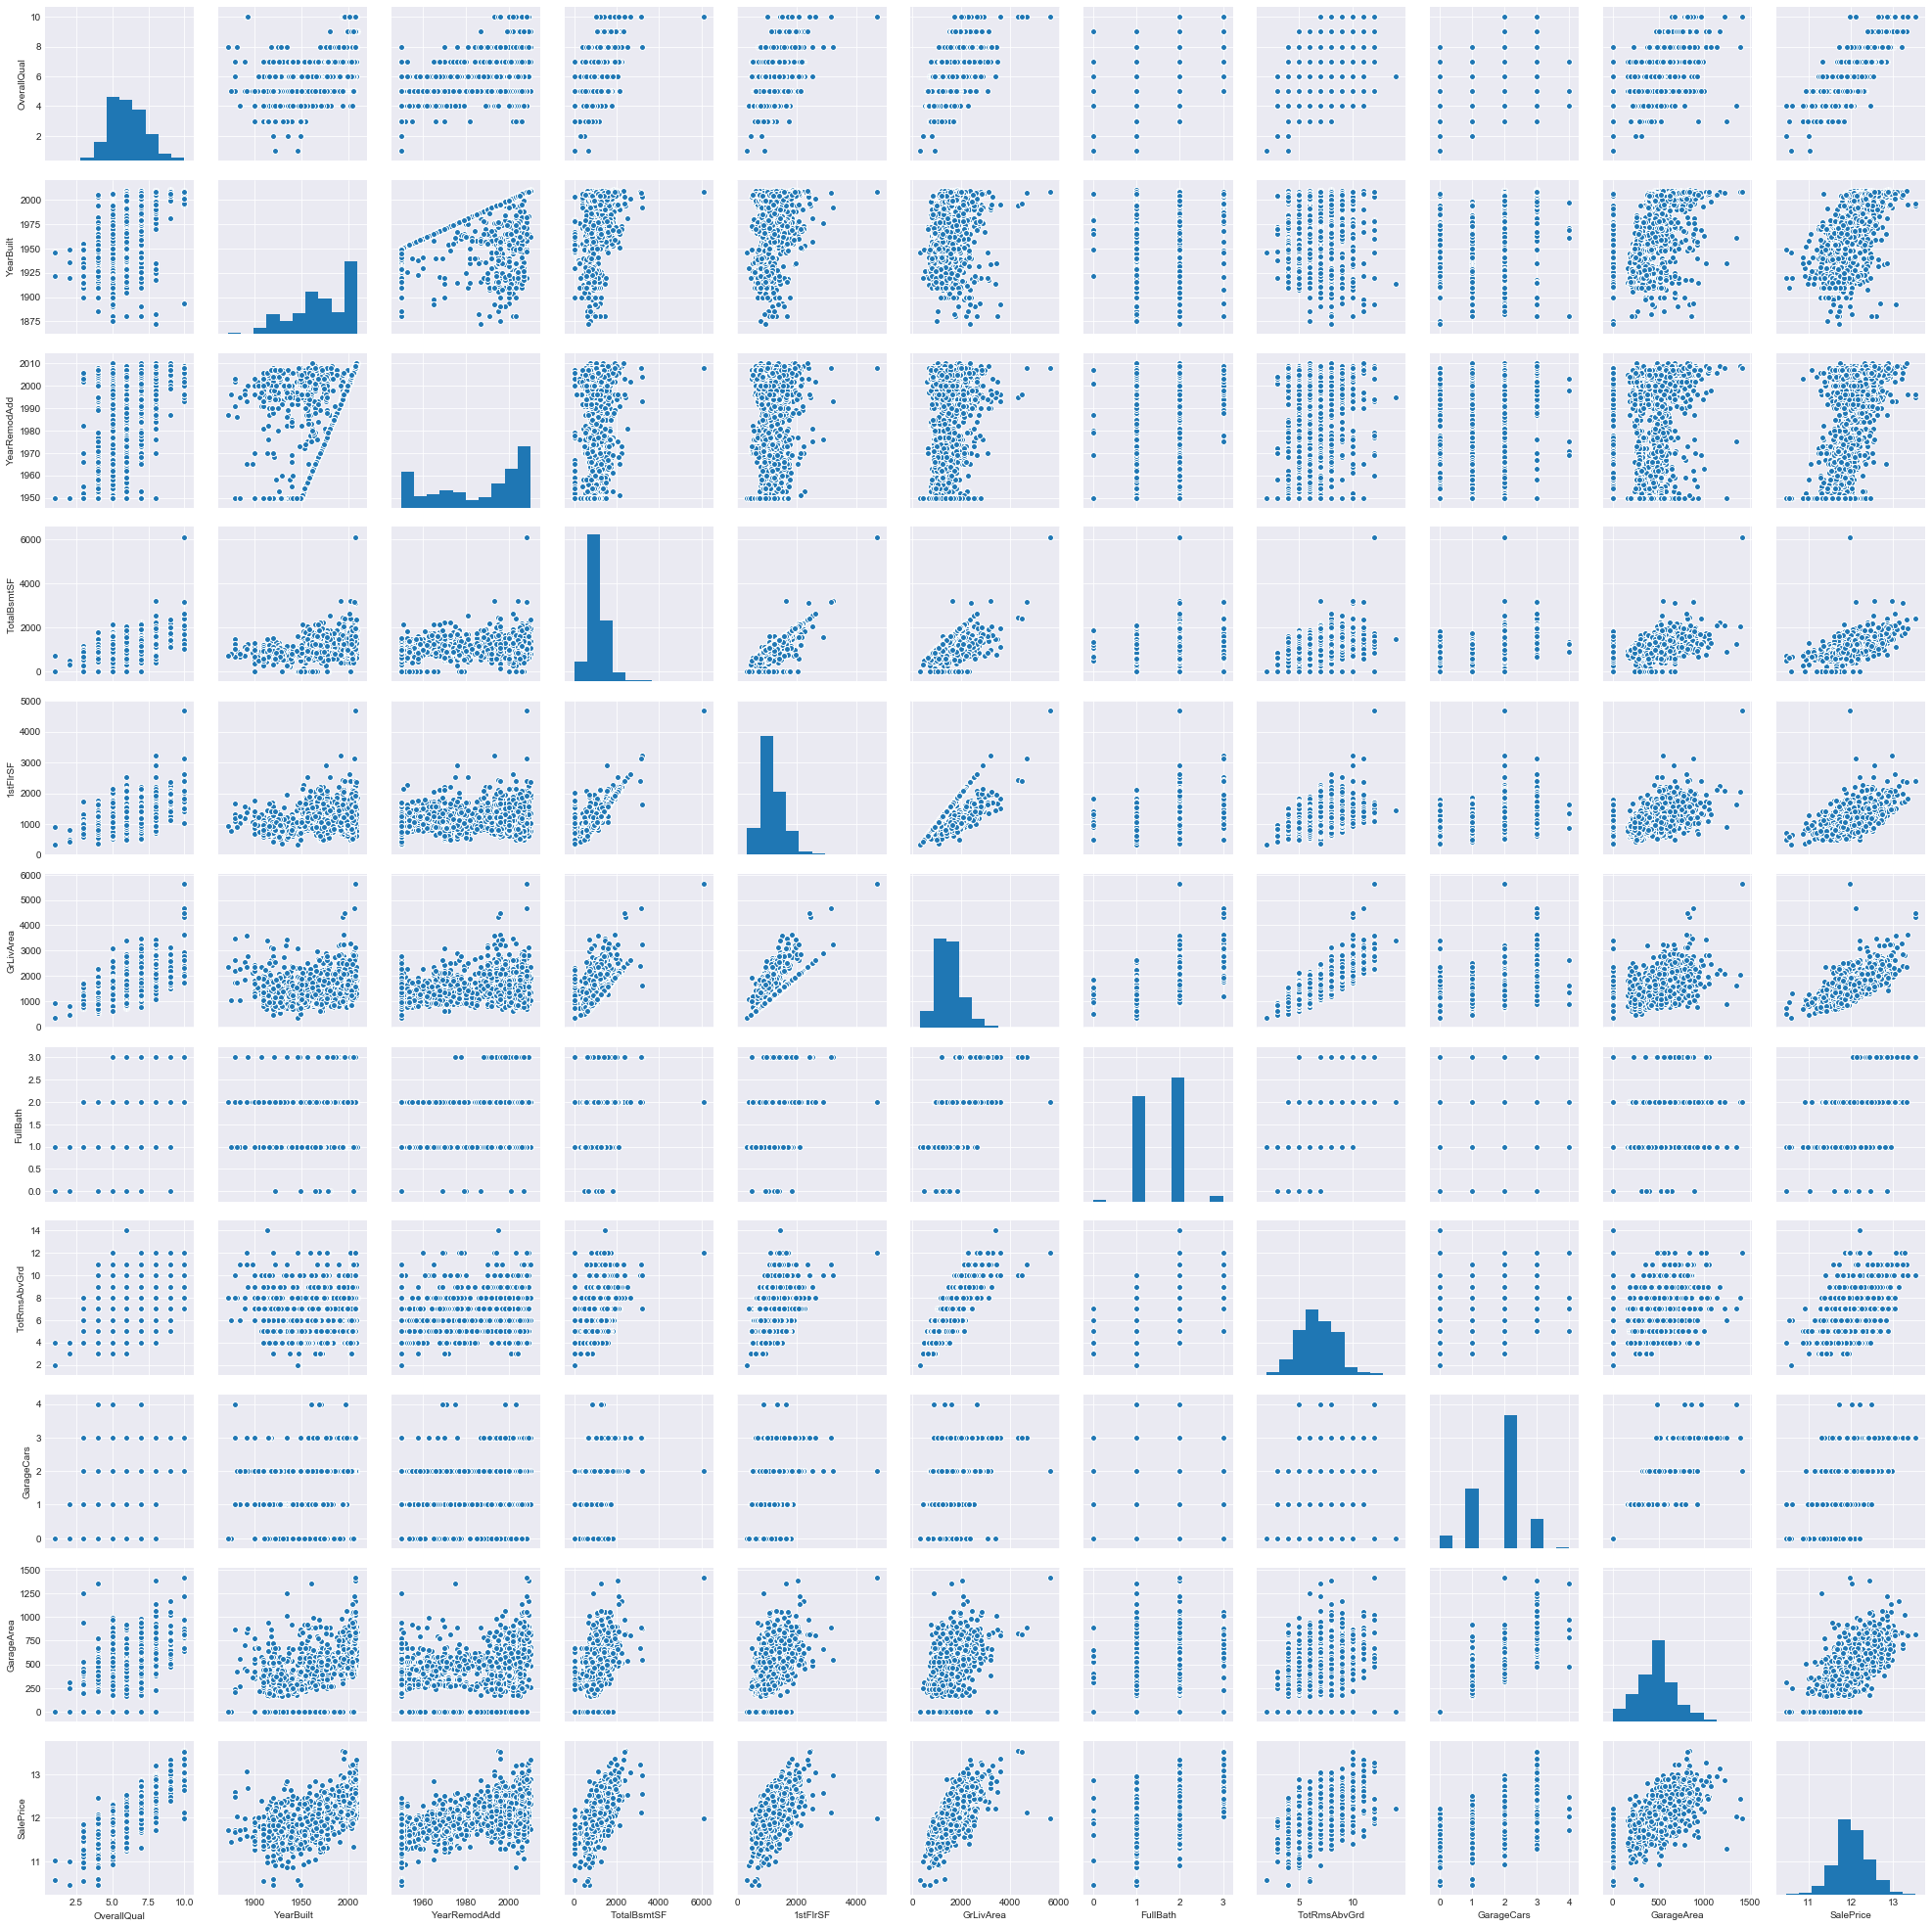

In [71]:
sns.pairplot(data=df_train[price_correlation.index])

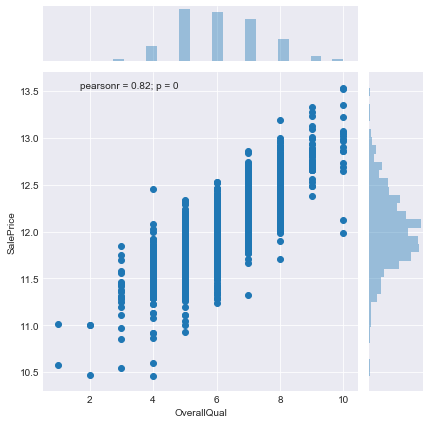

In [72]:
sns.jointplot(data=df_train, x='OverallQual', y='SalePrice')

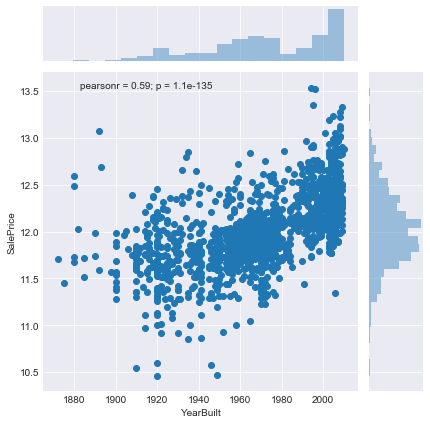

In [73]:
sns.jointplot(data=df_train, x='YearBuilt', y='SalePrice')

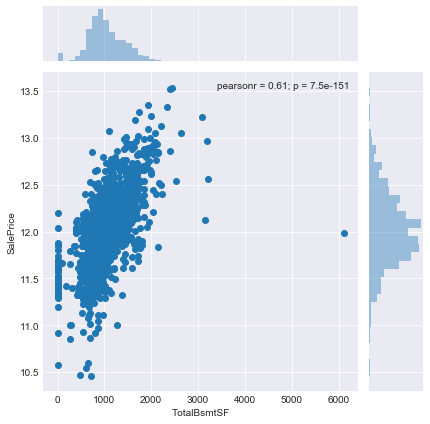

In [74]:
sns.jointplot(data=df_train, x='TotalBsmtSF', y='SalePrice')

In [75]:
# This house seem to be an outlier because of its low price and the TotalBsmtSF value.         
df_train[df_train['TotalBsmtSF'] > 6000][numeric_features]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1298  1299          60        313.0    63887           10            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1    ...      WoodDeckSF  \
1298       2008          2008       796.0        5644    ...             214   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1298          292              0          0            0       480        0   

      MoSold  YrSold  SalePrice  
1298       1    2008  11.982929  

[1 rows x 38 columns]

In [76]:
df_train.loc[1298,numeric_features], df_train.loc[1298,categorical_features]

(Id                  1299
 MSSubClass            60
 LotFrontage          313
 LotArea            63887
 OverallQual           10
 OverallCond            5
 YearBuilt           2008
 YearRemodAdd        2008
 MasVnrArea           796
 BsmtFinSF1          5644
 BsmtFinSF2             0
 BsmtUnfSF            466
 TotalBsmtSF         6110
 1stFlrSF            4692
 2ndFlrSF             950
 LowQualFinSF           0
 GrLivArea           5642
 BsmtFullBath           2
 BsmtHalfBath           0
 FullBath               2
 HalfBath               1
 BedroomAbvGr           3
 KitchenAbvGr           1
 TotRmsAbvGrd          12
 Fireplaces             3
 GarageYrBlt         2008
 GarageCars             2
 GarageArea          1418
 WoodDeckSF           214
 OpenPorchSF          292
 EnclosedPorch          0
 3SsnPorch              0
 ScreenPorch            0
 PoolArea             480
 MiscVal                0
 MoSold                 1
 YrSold              2008
 SalePrice        11.9829
 Name: 1298,

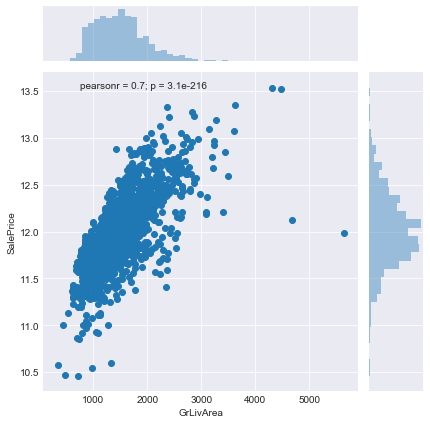

In [77]:
sns.jointplot(data=df_train, x='GrLivArea', y='SalePrice')

In [78]:
# These two houses also seem to be outliers because of their low price.
df_train[df_train['GrLivArea'] > 4500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
523        0     10   2007       New        Partial  12.126759  
1298       0      1   2008       New        Partial  11.982929  

[2 rows x 81 columns]

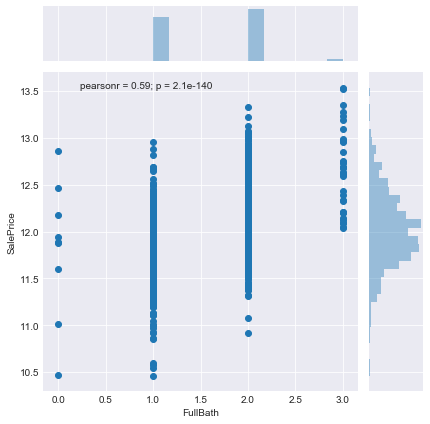

In [79]:
sns.jointplot(data=df_train, x='FullBath', y='SalePrice')

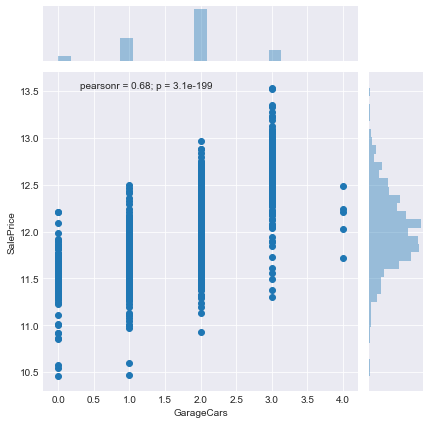

In [80]:
sns.jointplot(data=df_train, x='GarageCars', y='SalePrice')

#### Removing Outliers

In [81]:
df_train.drop([523, 1298], inplace=True)

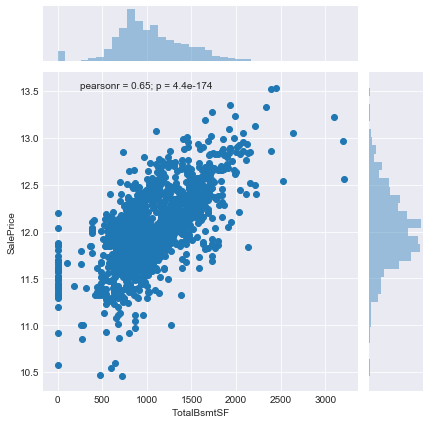

In [82]:
sns.jointplot(data=df_train, x='TotalBsmtSF', y='SalePrice')

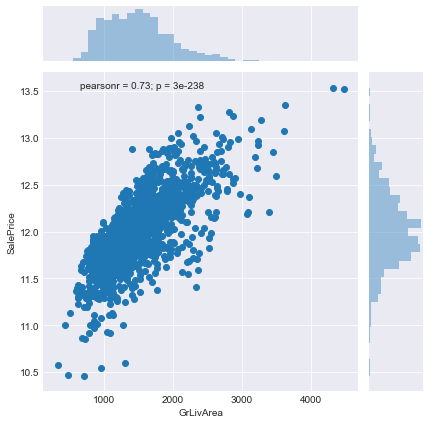

In [83]:
sns.jointplot(data=df_train, x='GrLivArea', y='SalePrice')

#### 1.2 - Categorical Features

In [84]:
ordinal_features = ['GarageCond', 'GarageQual', 'GarageFinish', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'KitchenQual',
                    'ExterQual', 'ExterCond', 'HeatingQC']

nominal_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1',
                    'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional',
                    'FireplaceQu', 'GarageType', 'PavedDrive', 'PoolQC', 'Fence',
                    'MiscFeature', 'SaleType', 'SaleCondition']

In [85]:
ord_values = {'GarageCond' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'GarageQual' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
              'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
              'BsmtCond' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'BsmtQual' : {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'ExterQual':  {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
              'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}}

dummy = 'GarageType', 'MSZoning', 'Exterior1st', 'PavedDrive','LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Foundation', 'Street', 'CentralAir',

## Engineering

## Model And Validation

## Submission